In [480]:
import numpy as np
import matplotlib.pyplot as plt

In [481]:
class XOR_podaci:
    X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
    ])

    y = np.array([
        [0],
        [1],
        [1],
        [0],
    ])
    
    W1 = np.array([
        [0.2, 0.9],
        [-0.9, 0.8]
    ])
    
    b1 = np.array([
        [-0.3, 0.2]
    ])
    
    W2 = np.array([
        [-0.2, -0.9],
    ])
    
    b2 = np.array([
        [0.7]
    ])

In [482]:
# za pretvaranja txt filea u format za obradu
def file_into_array(file):
    line_into_list = [i.split(' ') for i in file.read().splitlines()]
    return [
    [float(x) for x in sublist if x]
    for sublist in line_into_list
    ]

In [483]:
# učitavanje text file-ova u varijable
with open('podaci/Z.txt', 'r') as file:
    Z = file_into_array(file)

with open('podaci/D.txt', 'r') as file:
    D = file_into_array(file)

with open('podaci/V.txt', 'r') as file:
    V = file_into_array(file)

with open('podaci/W.txt', 'r') as file:
    W = file_into_array(file)

In [484]:
print(f'Z (prva 3): {Z[:3]}')
print(f'D (prva 3): {D[:3]}')
print(f'V (prvi): {V[:1]}')
print(f'W: {W}')

Z (prva 3): [[1.0, 0.0], [1.0, 0.16667], [1.0, 0.30556]]
D (prva 3): [[0.16667], [0.30556], [0.4213]]
V (prvi): [[-0.017115, -0.0086488, 0.011093]]
W: [[-0.010689, -0.008095, -0.029443, 0.014384, 0.0032519, -0.0075493]]


In [485]:
class P1_ident_podaci:
    X = np.array(Z)
    y = np.array(D)
    W1 = np.array([i[:2] for i in V])
    b1 = np.array([i[2:] for i in V]).T
    W2 = np.array([i[:-1] for i in W])
    b2 = np.expand_dims(np.array([i[-1] for i in W]), axis=0)

In [486]:
def aktivacijska_funkcija1(z, derivacija=False):
    if derivacija:
        return 0.5*(1-np.square(z))
    else:
        return 2/(1+np.exp(-z)) - 1
    
def aktivacijska_funkcija2(z, derivacija=False):
    if derivacija:
        return z*(1-z)
    else:
        return 1/(1+np.exp(-z))

In [487]:
def forward(z, podaci, aktivacijska_funkcija):
    h = z @ podaci.W1.T + podaci.b1
    H = aktivacijska_funkcija(h) 
    o = H @ podaci.W2.T + podaci.b2
    O = aktivacijska_funkcija(o)

    return O

In [488]:
def train(podaci, iteracije, learning_rate, momentum, aktivacijska_funkcija):
    loss_history = []

    X = podaci.X
    y = podaci.y
    W1 = podaci.W1
    b1 = podaci.b1
    W2 = podaci.W2
    b2 = podaci.b2

    vW1 = np.zeros_like(W1)
    vW2 = np.zeros_like(W2)
    vb1 = np.zeros_like(b1)
    vb2 = np.zeros_like(b2)

    for i in range(iteracije):
        # forward
        h = X @ W1.T + b1
        H = aktivacijska_funkcija(h) 
        o = H @ W2.T + b2
        O = aktivacijska_funkcija(o)

        # backprop
        error = y - O 
        do = error * aktivacijska_funkcija(O, derivacija=True)
        dH = do @ W2
        dh = dH * aktivacijska_funkcija(H, derivacija=True)
        dW2 = do.T @ H
        dW1 = dh.T @ X
        db2 = do.sum()
        db1 = dh.sum(axis=0)

        # momentum
        vW2 = learning_rate * dW2 + momentum * vW2
        vW1 = learning_rate * dW1 + momentum * vW1
        vb2 = learning_rate * db2 + momentum * vb2
        vb1 = learning_rate * db1 + momentum * vb1

        # optimization step
        W2 += vW2
        W1 += vW1
        b2 += vb2
        b1 += vb1

        # loss
        MS = np.mean(np.square(error))
        RMS = np.sqrt(MS)
        NRMS = RMS / np.sqrt(np.mean(np.square(y - np.mean(y))))

        loss = NRMS
        loss_history.append(loss)

    print(f"Konačan gubitak (NRMS): {loss}")

    # preds = forward(X, podaci=podaci, aktivacijska_funkcija=aktivacijska_funkcija).tolist()
    # for i, o in enumerate(preds):
    #     print(f'Ulazna vrijednost: {X[i]} --> Izlazna vrijednost: {o[0]:.3f}')
        
    plt.plot(range(iteracije), loss_history)
    plt.xlabel("Iteracija")
    plt.ylabel("NRMS")
    plt.title("Greška modela kroz iteracije")
    plt.show()

Konačan gubitak (NRMS): 0.9965211076607731


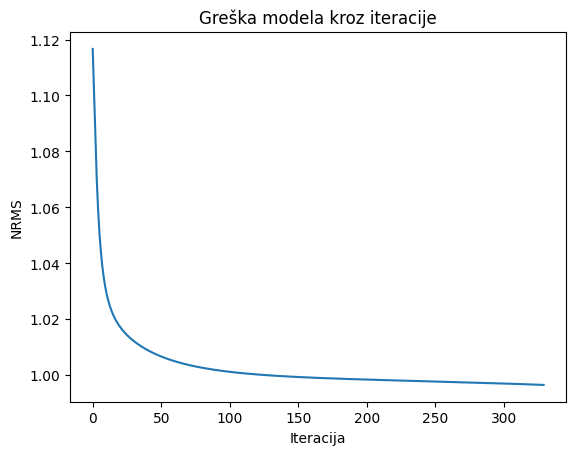

In [489]:
train(
    podaci=XOR_podaci, 
    aktivacijska_funkcija=aktivacijska_funkcija1, 
    iteracije=330, 
    learning_rate=0.1,
    momentum=0.3,
    )

Konačan gubitak (NRMS): 0.9950531477835359


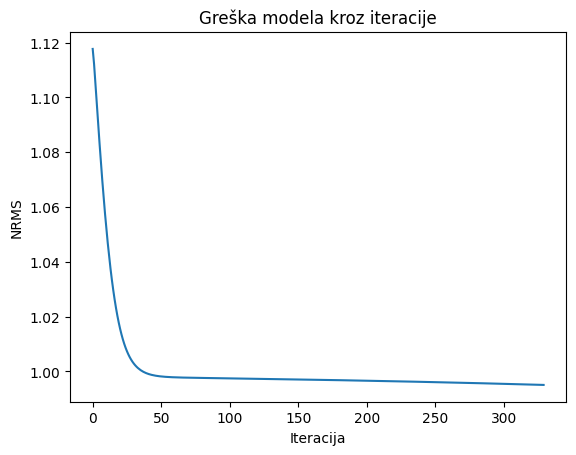

In [490]:
train(
    podaci=XOR_podaci, 
    aktivacijska_funkcija=aktivacijska_funkcija2, 
    iteracije=330, 
    learning_rate=0.1,
    momentum=0.3,
    )

Konačan gubitak (NRMS): 0.9999981486419955


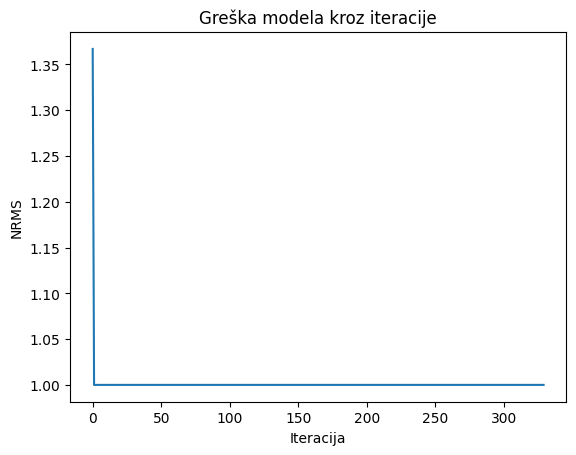

In [491]:
train(
    podaci=P1_ident_podaci, 
    aktivacijska_funkcija=aktivacijska_funkcija1, 
    iteracije=330, 
    learning_rate=0.1,
    momentum=0.3,
    )

Konačan gubitak (NRMS): 0.9999993661802407


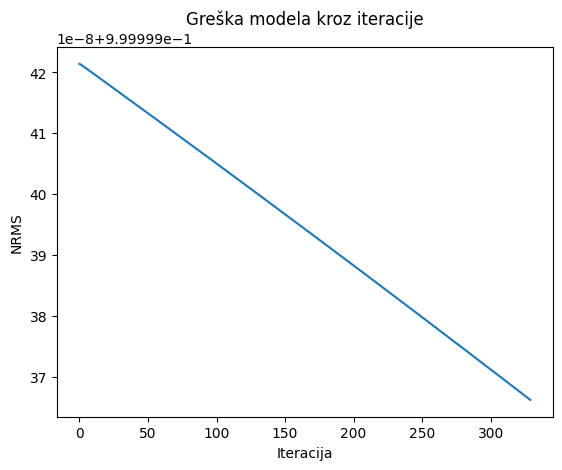

In [492]:
train(
    podaci=P1_ident_podaci, 
    aktivacijska_funkcija=aktivacijska_funkcija2, 
    iteracije=330, 
    learning_rate=0.1,
    momentum=0.3,
    )